# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

In [30]:
sinasc = pd.read_csv('sinasc_RO_2019.csv')
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [46]:
sinasc.loc[sinasc['APGAR5'] <= 3, 'APGAR5_categorizado'] = 'asfixia grave'
sinasc.loc[(sinasc['APGAR5'] > 3) & (sinasc['APGAR5'] <= 5), 'APGAR5_categorizado'] = 'asfixia moderada'
sinasc.loc[(sinasc['APGAR5'] > 5) & (sinasc['APGAR5'] <= 7 ), 'APGAR5_categorizado'] = 'asfixia leve'
sinasc.loc[sinasc['APGAR5'] > 7, 'APGAR5_categorizado'] = 'normal'
sinasc[['APGAR5_categorizado']]

,APGAR5_categorizado
0,normal
1,normal
2,normal
3,normal
4,normal
...,...
27023,normal
27024,normal
27025,normal
27026,normal


In [38]:
sinasc['APGAR5_categorizado'].value_counts()

normal              26463
asfixia leve          320
asfixia grave          74
asfixia moderada       68
Name: APGAR5_categorizado, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

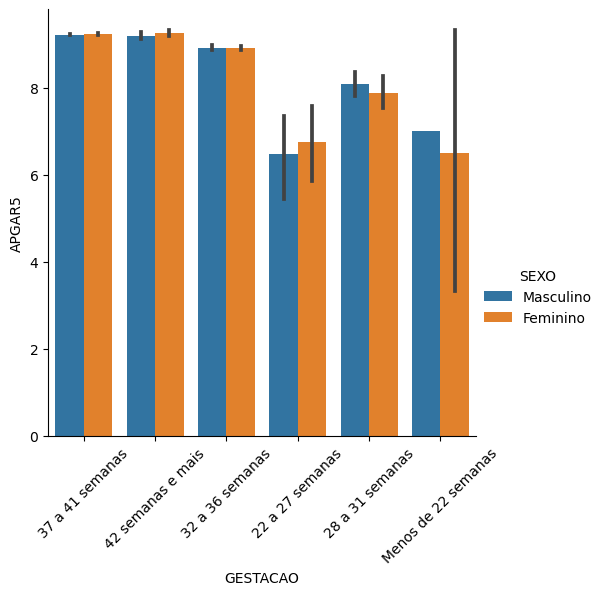

In [75]:
sns.catplot(x='GESTACAO', y='APGAR5'
             , hue='SEXO'
             , kind='bar'
             , data=sinasc)
plt.xticks(rotation=45)
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [77]:
tabela = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5'])
tabela

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [82]:
total_apgar5 = tabela.sum(axis = 1)
print(total_apgar5)
tabela_pctlin = tabela.div(total_apgar5, axis = 0)
tabela_pctlin

GESTACAO
22 a 27 semanas           85
28 a 31 semanas          162
32 a 36 semanas         2234
37 a 41 semanas        22523
42 semanas e mais        698
Menos de 22 semanas        7
dtype: int64


APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<AxesSubplot:xlabel='GESTACAO'>

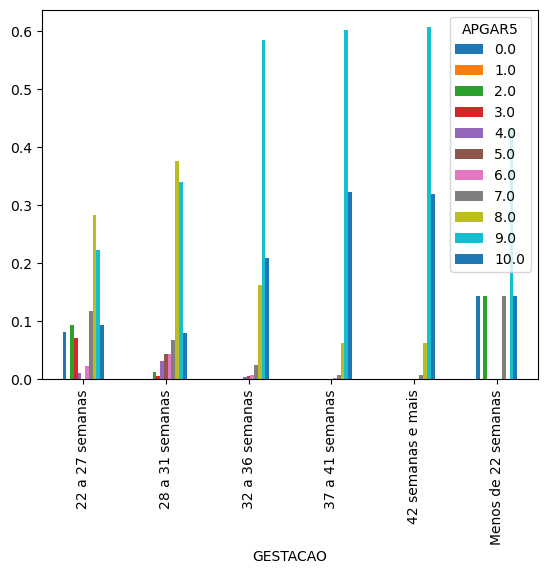

In [83]:
tabela_pctlin.plot.bar()

O gráfico mostra que a ocorrência de asfixia (APGAR5 < 8) torna-se mais notável nos períodos de gestação inferiores a 31 semanas. Assumindo que bebês prematuros tenham maior tendência a asfixias no parto, o conjunto de dados não corrobora com a afirmação dos médicos, uma vez que as ocorrências de asfixias são muito baixas no período de 32 a 36 semanas de gestação.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

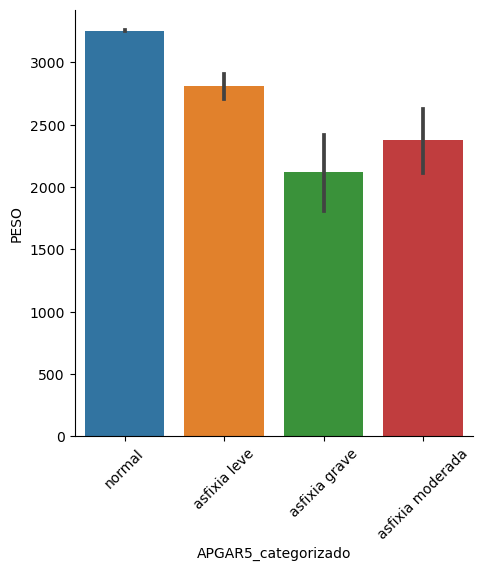

In [95]:
# Analisando a relação a partir da categorização do APGAR5 realizada anteriormente.
sns.catplot(x='APGAR5_categorizado', y='PESO'
            , data = sinasc
           , kind = 'bar')
plt.xticks(rotation=45)
plt.show()

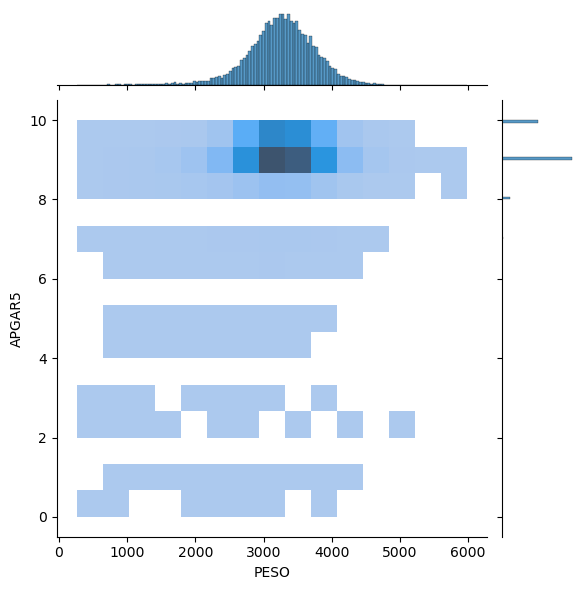

In [98]:
# Analisando a relação utilizando ambas como variaveis númpericas:
sns.jointplot(x = 'PESO', y = 'APGAR5'
              , data = sinasc
              , kind = "hist"
              , bins = [15, 15])

O gráfico que permitiu melhor visualização foi o primeiro, na qual APGAR5 era uma string. A partir dele, observa-se que os bebês que sofreram algum tipo de asfixia (APGAR5 < 8) apresentavam peso médio inferior aos que tiveram apgar5 normal. Tanto que os bebês cujo apgar foi normal tiveram peso médio próximo a 3100 g, enquanto que nos casos de asfixia, o peso médio variava entre 2100 g e 2800 g. Assim, é possível suspeitar de que as crianças sujeitas a asfixia no parto tendem a apresentar peso inferior às que não sofrem.
Possivelmente, utilizando o gráfico da questão anterior, pode-se dizer que a ocorrência de baixo peso se deve ao nascimento prematuro do bebê, na qual também há maior ocorrência de asfixia.